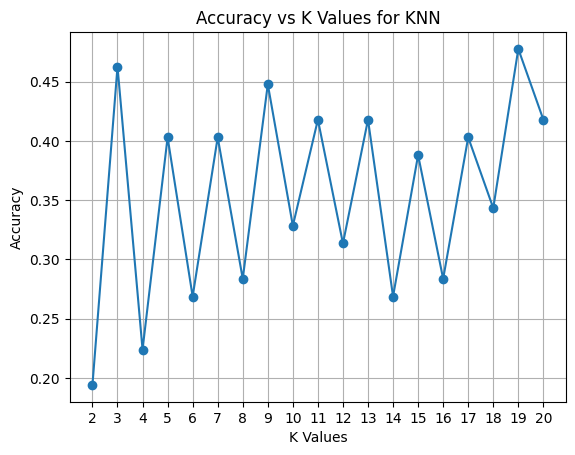

In [14]:
#ML ASSIGNMENT 4
#2203A52189
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv("/content/breast_cancer_survival.csv")
data_encoded = pd.get_dummies(data)
X = data_encoded.drop(columns=['Tumour_Stage_II', 'Tumour_Stage_I', 'Tumour_Stage_III'])
y = data_encoded[['Tumour_Stage_II', 'Tumour_Stage_I', 'Tumour_Stage_III']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = range(2, 21)
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs K Values for KNN')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 21, step=1))
plt.grid(True)
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Decision Tree Model Evaluation:
Accuracy: 0.4626865671641791
Precision: 0.46760701984582587
Recall: 0.4626865671641791
F1 Score: 0.46500969134636244
Confusion Matrix:
[[24  8  8]
 [ 6  4  3]
 [ 9  2  3]]


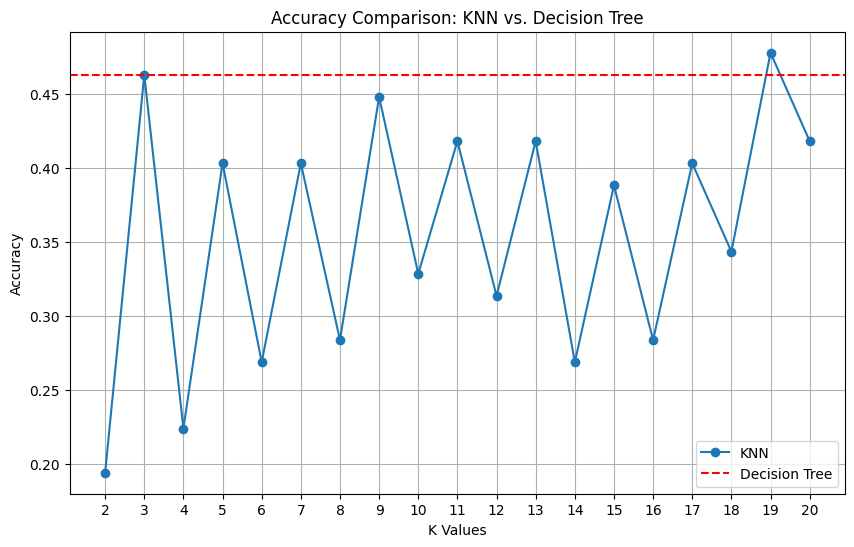

Final Comparison:
KNN Accuracy: 0.47761194029850745
Decision Tree Accuracy: 0.4626865671641791


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, label='KNN', marker='o')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Decision Tree')
plt.title('Accuracy Comparison: KNN vs. Decision Tree')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 21, step=1))
plt.legend()
plt.grid(True)
plt.show()
print("Final Comparison:")
print("KNN Accuracy:", max(accuracy_values))
print("Decision Tree Accuracy:", accuracy)